In [126]:
# 데이터 정리 구간
import pandas as pd
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

csv = pd.read_csv('data.csv')

X = csv.values[:,:18]
noh_y = csv.values[:,18]

y = utils.to_categorical(noh_y, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1004)
nX_train, nX_test, ny_train, ny_test = train_test_split(X, noh_y, stratify=y, test_size=0.3, random_state=1004)

In [127]:
# 정렬 후 그래프 출력
import matplotlib.pyplot as plt

def sorting_plt(values):
    keys = csv.columns[:-1]
    lst = {}
    for i,j in zip(keys,values):
        lst[j] = i
    
    lst = sorted(lst.items(), reverse=0)
    
    plt.barh([i[1] for i in lst], [i[0] for i in lst])
    plt.show()

In [135]:
# 그리디 서치 알고리즘 실행 구간, 주석처럼 매개변수 입력
from sklearn.model_selection import GridSearchCV

def Grid_cv(model, params, X, y):
    grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs= -1)
    grid_cv.fit(X,y)
    return grid_cv

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#         }

의사결정 나무 Decision Tree<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [129]:
from sklearn.ensemble import RandomForestClassifier

# 매개변수 설정
dt_params = {
    'n_estimators' : [10],
    'max_depth' : [6],
    'min_samples_split' : [8],
    'min_samples_leaf' : [8]
}

# 그리디 알고리즘으로 최적의 매개변수 찾기
dt = RandomForestClassifier(random_state=0, n_jobs= -1)
dt_result = Grid_cv(dt, dt_params, X_train, y_train)

# 찾은 매개변수와 스코어 출력
print(dt_result.best_params_)
print(dt_result.best_score_)
print(dt_result.score(X_test, y_test))
pd.DataFrame(dt_result.cv_results_)

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
0.9226814268142681
0.9076996652319465


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065478,0.001698,0.020614,0.002352,6,8,8,10,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.928044,0.915692,0.924308,0.922681,0.005172,1


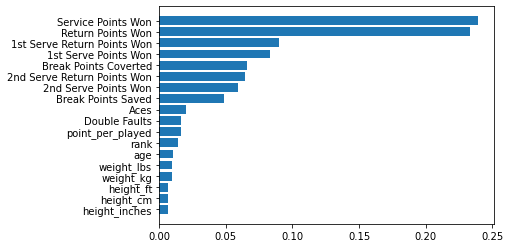

In [130]:
# 최적의 매개변수를 바탕으로 모델 학습
best_dt = RandomForestClassifier(random_state=0, n_jobs= -1)
best_dt.fit(X,y)

# 학습 후 그래프 출력
sorting_plt(best_dt.feature_importances_)

그래디언트 부스팅 Gradient Boosting<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

# 매개변수 설정
gb_params = {
    'learning_rate' : [0.01],
    'n_estimators' : [10],
    'min_samples_split' : [8],
    'min_samples_leaf' : [8],
    'max_depth' : [6]
}

# 그리디 알고리즘으로 최적의 매개변수 찾기
gb = GradientBoostingClassifier(random_state=0)
gb_result = Grid_cv(gb, gb_params, nX_train, ny_train)

# 찾은 매개변수와 스코어 출력
print(gb_result.best_params_)
print(gb_result.best_score_)
print(gb_result.score(nX_test, ny_test))
pd.DataFrame(gb_result.cv_results_)

{'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
0.9130439335162582
0.8947871831659493


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.171892,0.002443,0.0,0.0,0.01,6,8,8,10,"{'learning_rate': 0.01, 'max_depth': 6, 'min_s...",0.910824,0.910154,0.918154,0.913044,0.003624,1


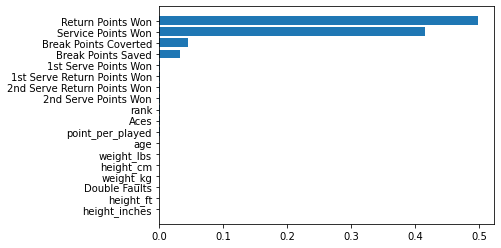

In [132]:
# 최적의 매개변수를 바탕으로 모델 학습
best_gb = GradientBoostingClassifier(random_state=0)
best_gb.fit(X, noh_y)

# 학습 후 그래프 출력
sorting_plt(best_gb.feature_importances_)

에이다부스트 AdaBoost<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [133]:
from sklearn.ensemble import AdaBoostClassifier

# 매개변수 설정
ab_params = {
    'n_estimators' : [10],
    'learning_rate' : [1.0]
}

# 그리디 알고리즘으로 최적의 매개변수 찾기
ab = AdaBoostClassifier(random_state=0)
ab_result = Grid_cv(ab, ab_params, nX_train, ny_train)

# 찾은 매개변수와 스코어 출력
print(ab_result.best_params_)
print(ab_result.best_score_)
print(ab_result.score(nX_test, ny_test))
pd.DataFrame(ab_result.cv_results_)

{'learning_rate': 1.0, 'n_estimators': 10}
0.9128379222253762
0.8914395026303205


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078792,0.003741,0.00797,0.001398,1.0,10,"{'learning_rate': 1.0, 'n_estimators': 10}",0.915129,0.909538,0.913846,0.912838,0.002391,1


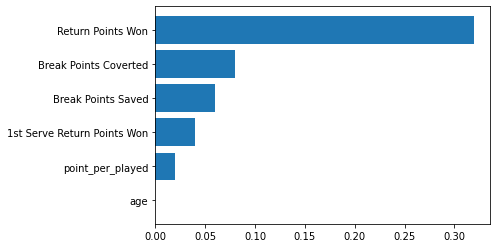

In [134]:
# 최적의 매개변수를 바탕으로 모델 학습
best_gb = AdaBoostClassifier(random_state=0)
best_gb.fit(X, noh_y)

# 학습 후 그래프 출력
sorting_plt(best_gb.feature_importances_)